In [1]:
# Data manipulation packages
import pandas as pd  # Pandas provides data structures for efficiently storing large datasets and tools for data analysis.
import numpy as np   # NumPy is used for numerical operations and array manipulations.

# Data Visualization packages
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Machine learning Packages
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  # ColumnTransformer allows applying different transformers to different columns in a dataset.
from sklearn.impute import SimpleImputer  # SimpleImputer is used for handling missing data by imputing missing values with specified strategies.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # These classes provide different methods for scaling/normalizing numerical features.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder  # These classes handle categorical feature encoding (one-hot, label, and ordinal encoding).
from sklearn.preprocessing import FunctionTransformer  # FunctionTransformer allows applying custom functions to transform data.
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier is an implementation of a decision tree classifier.
from sklearn.metrics import accuracy_score, classification_report  # These metrics are used for evaluating classification model performance.
from sklearn.model_selection import train_test_split  # train_test_split is used to split a dataset into training and testing sets.
from statsmodels.tsa.stattools import adfuller
from sklearn import set_config  # set_config allows configuring global scikit-learn behavior.
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is an ensemble learning method based on decision trees.
from sklearn.svm import SVC  # Support Vector Classifier (SVC) is a classifier that uses support vector machines for classification.
from sklearn.preprocessing import PowerTransformer  # PowerTransformer applies power transformations to make data more Gaussian-like.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes is a probabilistic classifier based on the Gaussian distribution.
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier is an ensemble method that builds a sequence of weak learners (trees).
from scipy.stats import pearsonr  # Pearson correlation coefficient measures the linear relationship between two variables.
from sklearn.model_selection import cross_val_score  # cross_val_score is used for cross-validated model performance evaluation.
from imblearn.under_sampling import RandomUnderSampler  # RandomUnderSampler is used for under-sampling to address class imbalance.
from imblearn.over_sampling import RandomOverSampler, SMOTE  # RandomOverSampler and SMOTE are used for over-sampling to address class imbalance.
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # SelectKBest performs feature selection based on scoring functions like mutual information.
from imblearn.over_sampling import SMOTE  # SMOTE is a technique for generating synthetic samples to address class imbalance.
from sklearn.datasets import make_classification  # make_classification generates a synthetic dataset for classification.
from sklearn.metrics import roc_curve, roc_auc_score  # roc_curve and roc_auc_score are used for Receiver Operating Characteristic (ROC) curve analysis.
from sklearn.metrics import confusion_matrix  # confusion_matrix calculates the confusion matrix for classification models.
from sklearn.model_selection import GridSearchCV  # GridSearchCV performs hyperparameter tuning using grid search.

# Database connection package
import pyodbc  # PyODBC is a Python module that makes accessing ODBC databases simple.
from dotenv import dotenv_values  # dotenv loads environment variables from a .env file.

# Ignore warnings (optional)
import warnings  # The warnings module provides a way to handle warnings in Python.
warnings.filterwarnings("ignore")

# Step 1: Data Connection & Importation

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinP"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 


connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM dbo.oil"

oil_table = pd.read_sql(query, connection)

#Holiday_events table 

query = "SELECT * FROM dbo.holidays_events"

holiday_events = pd.read_sql(query, connection)

#Stores Table

query = "SELECT * FROM dbo.stores"

stores_table = pd.read_sql(query, connection)

In [6]:
# Load the third dataset (it's a CSV file named 'test', 'transaction', 'sample_submission') and set the date column as the index

test_data = pd.read_csv('test.csv', index_col=0, parse_dates=True)

train_data = pd.read_csv('train.csv', index_col=0, parse_dates=True)

transaction_data = pd.read_csv('transactions.csv')

sample_data = pd.read_csv('sample_submission.csv')






# Step 2: Data Exploration and Understanding for the CSV files 

In [7]:
# Function to display information with a separator
def display_info(df, name):
    print(f"{name} Info:")
    print('=' * 50)
    df_info = df.info()
    display(df_info)
    print('=' * 50)

# Display information for train_data
display_info(train_data, "Train Data")

# Display information for test_data
display_info(test_data, "Test Data")

# Display information for transaction_data
display_info(transaction_data, "Transaction Data")



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         28512 non-null  object
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


None

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


None

In [8]:
# Function to display information with a separator
def display_shape(df, name):
    print(f"{name} Shape:")
    print('=' * 50)
    df_shape = df.shape
    display(df_shape)
    print('=' * 50)

# Display information for train_data
display_shape(train_data, "Train Data")

# Display information for test_data
display_shape(test_data, "Test Data")

# Display information for transaction_data
display_shape(transaction_data, "Transaction Data")



Train Data Shape:


(3000888, 5)

Test Data Shape:


(28512, 4)

Transaction Data Shape:


(83488, 3)

In [9]:
# Function to display information with a separator and describe
def display_describe(df, name):
    print(f"{name} Describe:")
    print('=' * 50)
    df_describe = df.describe()
    display(df_describe)
    print('=' * 50)

# Display describe for train_data
display_describe(train_data, "Train Data")

# Display describe for test_data
display_describe(test_data, "Test Data")

# Display describe for transaction_data
display_describe(transaction_data, "Transaction Data")



Train Data Describe:


,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


Test Data Describe:


,store_nbr,onpromotion
count,28512.000000,28512.000000
mean,27.500000,6.965383
std,15.586057,20.683952
min,1.000000,0.000000
25%,14.000000,0.000000
50%,27.500000,0.000000
75%,41.000000,6.000000
max,54.000000,646.000000


Transaction Data Describe:


,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [10]:
# Function to add year and month columns with month names
def add_year_month_columns(df, name):
    print(f"Adding Year and Month Columns for {name}:")
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Add 'year' and 'month' columns with month names
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.strftime('%B')
    
    print(f"Columns added for {name}:\n{df.head()}\n")

# Add year and month columns for train_data
add_year_month_columns(train_data, "Train Data")

# Add year and month columns for test_data
add_year_month_columns(test_data, "Test Data")

# Add year and month columns for transaction_data
add_year_month_columns(transaction_data, "Transaction Data")





Adding Year and Month Columns for Train Data:
Columns added for Train Data:
         date  store_nbr      family  sales  onpromotion  year    month
id                                                                     
0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013  January
1  2013-01-01          1   BABY CARE    0.0            0  2013  January
2  2013-01-01          1      BEAUTY    0.0            0  2013  January
3  2013-01-01          1   BEVERAGES    0.0            0  2013  January
4  2013-01-01          1       BOOKS    0.0            0  2013  January

Adding Year and Month Columns for Test Data:
Columns added for Test Data:
              date  store_nbr      family  onpromotion  year   month
id                                                                  
3000888 2017-08-16          1  AUTOMOTIVE            0  2017  August
3000889 2017-08-16          1   BABY CARE            0  2017  August
3000890 2017-08-16          1      BEAUTY            2  2017  August


In [11]:
# Function to check for missing values
def check_missing_values(df, name):
    print(f"Missing Values in {name}:")
    print('=' * 50)
    missing_values = df.isnull().sum()
    display(missing_values[missing_values > 0])

# Check for missing values in train_data
check_missing_values(train_data, "Train Data")

# Check for missing values in test_data
check_missing_values(test_data, "Test Data")

# Check for missing values in transaction_data
check_missing_values(transaction_data, "Transaction Data")



Missing Values in Train Data:


Series([], dtype: int64)

Missing Values in Test Data:


Series([], dtype: int64)

Missing Values in Transaction Data:


Series([], dtype: int64)

## check for stationarity

In [12]:

# Function to check for stationarity
def check_stationarity(df, name):
    print(f"Checking Stationarity for {name}:")
  
    
    # Assuming your time series data is in a column named 'your_column'
    time_series_column = 'date'  # Replace with the actual column name
    
    # Calculate ADF test statistics
    result = adfuller(df[time_series_column])
    
    # Print ADF test results
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    
    # Interpret the results
    if result[1] <= 0.05:
        print("Conclusion: The time series is likely stationary.")
    else:
        print("Conclusion: The time series is likely non-stationary.")



# Check for stationarity in test_data
check_stationarity(test_data, "Test Data")

print('=' * 50)

# Check for stationarity in transaction_data
check_stationarity(transaction_data, "Transaction Data")





Checking Stationarity for Test Data:
ADF Statistic: 3.873823175627018
P-value: 1.0
Critical Values:
   1%: -3.430579381251199
   5%: -2.8616413801183174
   10%: -2.566823961577054
Conclusion: The time series is likely non-stationary.
Checking Stationarity for Transaction Data:
ADF Statistic: 44.75603785873031
P-value: 1.0
Critical Values:
   1%: -3.4304283906071458
   5%: -2.8615746473443426
   10%: -2.5667884415822226
Conclusion: The time series is likely non-stationary.


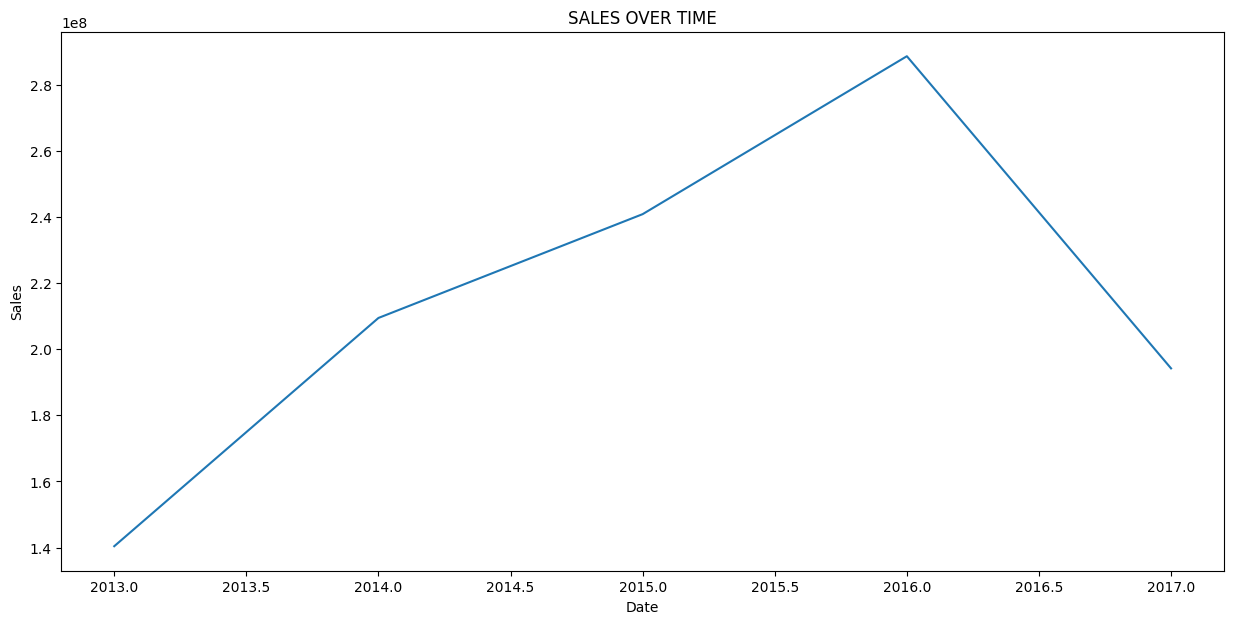

In [13]:
sales_time = train_data.groupby("year").sales.sum().reset_index()
sales_time = sales_time.set_index("year")
sales_time.plot(legend=False, figsize=(15, 7))

plt.title("SALES OVER TIME")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.style.use("fivethirtyeight")
plt.show()

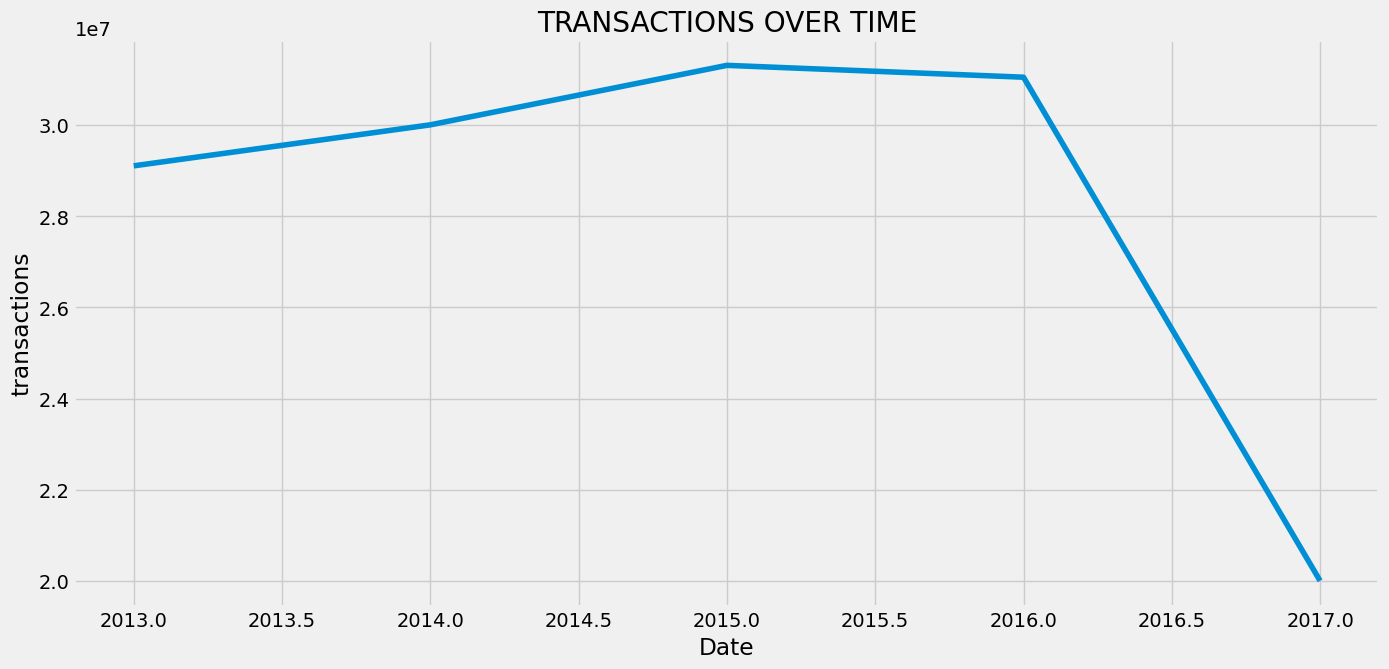

In [14]:
sales_time = transaction_data.groupby("year").transactions.sum().reset_index()
sales_time = sales_time.set_index("year")
sales_time.plot(legend=False, figsize=(15, 7))

plt.title("TRANSACTIONS OVER TIME")
plt.ylabel("transactions")
plt.xlabel("Date")
plt.style.use("fivethirtyeight")
plt.show()

# Step 3: Data Exploration and Understanding for the SQL files 

In [15]:

# Display summary statistics for the 'object' columns in holiday_events
holiday_summary = holiday_events.describe(include='object').T

# Display summary statistics for the 'object' columns in stores_table
stores_summary = stores_table.describe(include='object').T

# Display summary statistics for the 'object' columns in oil_table
oil_summary = oil_table.describe(include='object').T

# Display the results
print("Holiday Events Summary:")
display(holiday_summary)
print ('=' * 50)
print("Stores Summary:")
display(stores_summary)
print ('=' * 50)
print("Oil Summary:")
display(oil_summary)


Holiday Events Summary:


,count,unique,top,freq
date,350,312,2014-06-25,4
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10


Stores Summary:


,count,unique,top,freq
city,54,22,Quito,18
state,54,16,Pichincha,19
type,54,5,D,18


Oil Summary:


,count,unique,top,freq
date,1218,1218,2013-01-01,1


In [16]:

# Display info for holiday_events
print("Holiday Events Info:")
print ('=' * 50)
holiday_events_info = holiday_events.info()
display(holiday_events_info)


# Display info for stores_table
print("Stores Table Info:")
print ('=' * 50)
stores_table_info = stores_table.info()
display(stores_table_info)


# Display info for oil_table
print("Oil Table Info:")
print ('=' * 50)
oil_table_info = oil_table.info()
display(oil_table_info)



Holiday Events Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


None

Stores Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

Oil Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


None

In [17]:

# Display missing value counts for holiday_events
print("Holiday Events Missing Values:")
print('=' * 50)
holiday_events_missing = holiday_events.isnull().sum()
display(holiday_events_missing)

# Display missing value counts for stores_table
print("\nStores Table Missing Values:")
print('=' * 50)
stores_missing = stores_table.isnull().sum()
display(stores_missing)

# Display missing value counts for oil_table
print("\nOil Table Missing Values:")
print('=' * 50)
oil_missing = oil_table.isnull().sum()
display(oil_missing)


Holiday Events Missing Values:


date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


Stores Table Missing Values:


store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


Oil Table Missing Values:


date           0
dcoilwtico    43
dtype: int64

In [18]:
# Display shape information for holiday_events
print("Holiday Events Shape:")
print('=' * 50)
holiday_events_shape = holiday_events.shape
print("Number of rows:", holiday_events_shape[0])
print("Number of columns:", holiday_events_shape[1])

# Display shape information for stores_table
print("\nStores Table Shape:")
print('=' * 50)
stores_shape = stores_table.shape
print("Number of rows:", stores_shape[0])
print("Number of columns:", stores_shape[1])

# Display shape information for oil_table
print("\nOil Table Shape:")
print('=' * 50)
oil_shape = oil_table.shape
print("Number of rows:", oil_shape[0])
print("Number of columns:", oil_shape[1])


Holiday Events Shape:
Number of rows: 350
Number of columns: 6

Stores Table Shape:
Number of rows: 54
Number of columns: 5

Oil Table Shape:
Number of rows: 1218
Number of columns: 2


In [19]:
# Display descriptive statistics for holiday_events
print("Holiday Events Descriptive Statistics:")
print('=' * 50)
holiday_events_describe = holiday_events.describe()
display(holiday_events_describe)

# Display descriptive statistics for stores_table
print("\nStores Table Descriptive Statistics:")
print('=' * 50)
stores_describe = stores_table.describe()
display(stores_describe)

# Display descriptive statistics for oil_table
print("\nOil Table Descriptive Statistics:")
print('=' * 50)
oil_describe = oil_table.describe()
display(oil_describe)


Holiday Events Descriptive Statistics:


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338



Stores Table Descriptive Statistics:


,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000



Oil Table Descriptive Statistics:


,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190001
25%,46.405001
50%,53.189999
75%,95.660000
max,110.620003


#  Insights into the variety and frequency of different types of holidays.

In [57]:
transferred_holidays = holiday_events[holiday_events['transferred'] == True][['date', 'transferred', 'type']]
observed_transferred_holidays = holiday_events[holiday_events.type == 'Transfer']
work_days_holidays = holiday_events[holiday_events.type == 'Work Day']    
additional_holidays = holiday_events[holiday_events.type == 'Additional']
bridge_holidays = holiday_events[holiday_events.type == 'Bridge']
national_holidays = holiday_events[holiday_events.type == 'National']
regional_holidays = holiday_events[holiday_events.type == 'Regional']
event_holidays = holiday_events[holiday_events.type == 'Event']

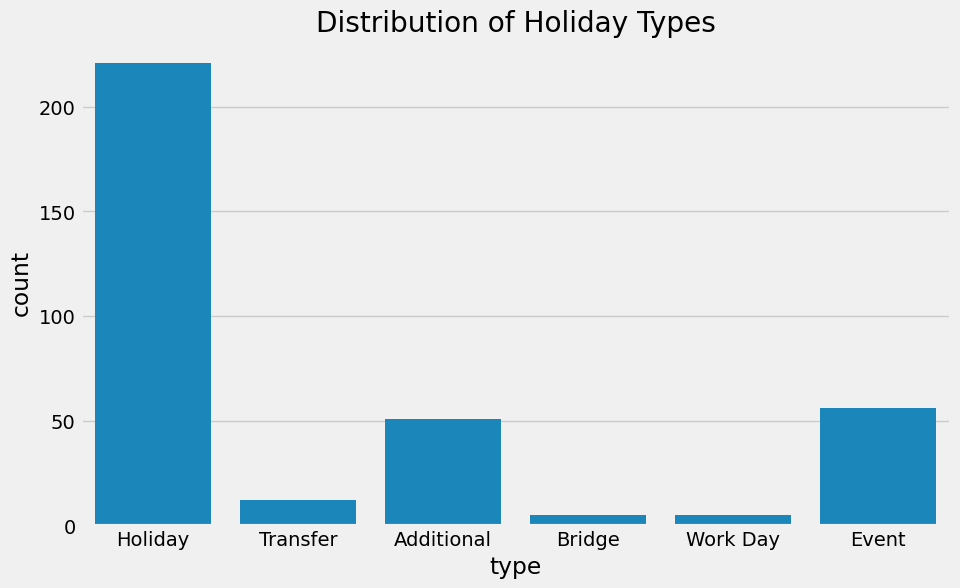

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=holiday_events)
plt.title('Distribution of Holiday Types')
plt.show()


In [60]:
holiday_events['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

# Grouping holidays by month & seasons to identify any recurring patterns

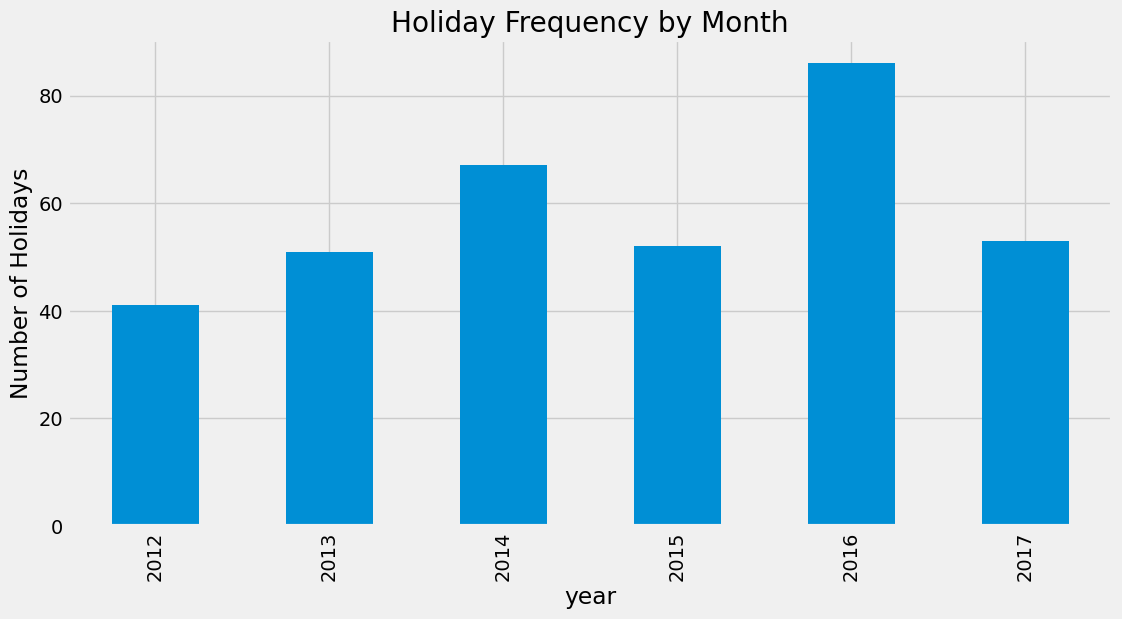

In [61]:
# Convert 'date' to datetime format if it's not already
holiday_events['date'] = pd.to_datetime(holiday_events['date'])

# Create a new 'year' column with year names
holiday_events['year'] = holiday_events['date'].dt.strftime('%Y')


plt.figure(figsize=(12, 6))
holiday_events['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Holiday Frequency by Month')
plt.xlabel('year')
plt.ylabel('Number of Holidays')
plt.show()



In [23]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
 6   year         350 non-null    object        
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 16.9+ KB


# Identify regions with more or fewer holidays.

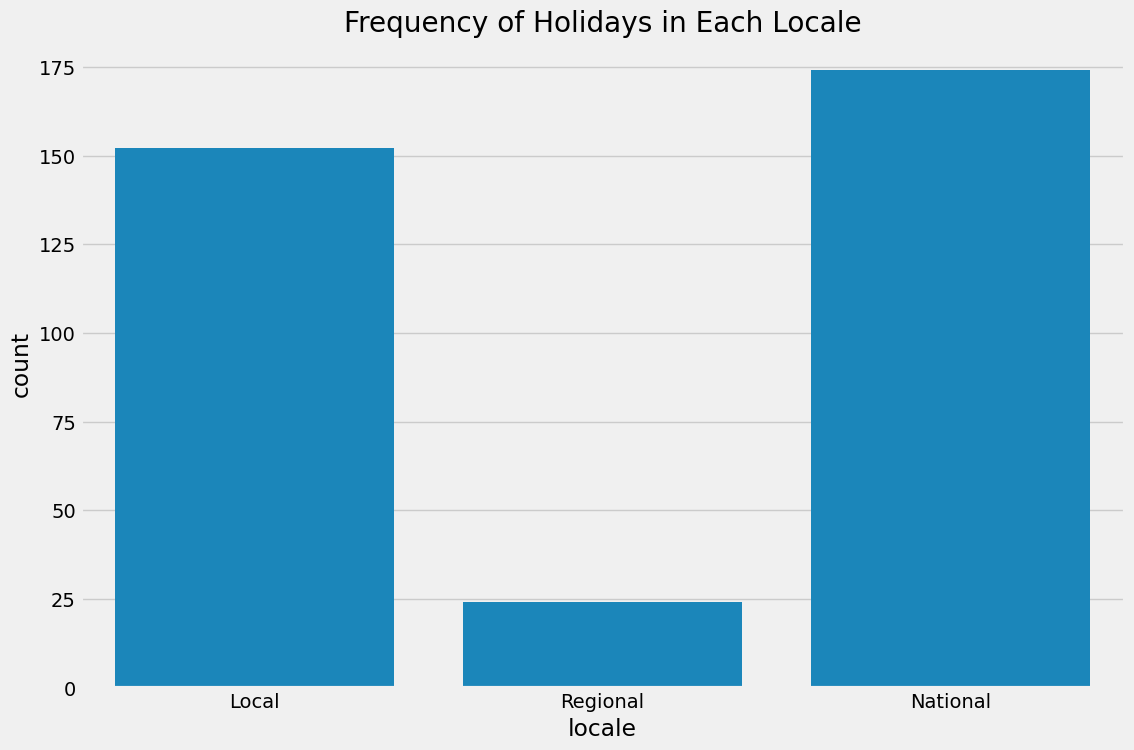

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x='locale', data=holiday_events)
plt.title('Frequency of Holidays in Each Locale')
plt.show()


#  Using a pie chart to give an overview of how common it is for holidays to be transferred.

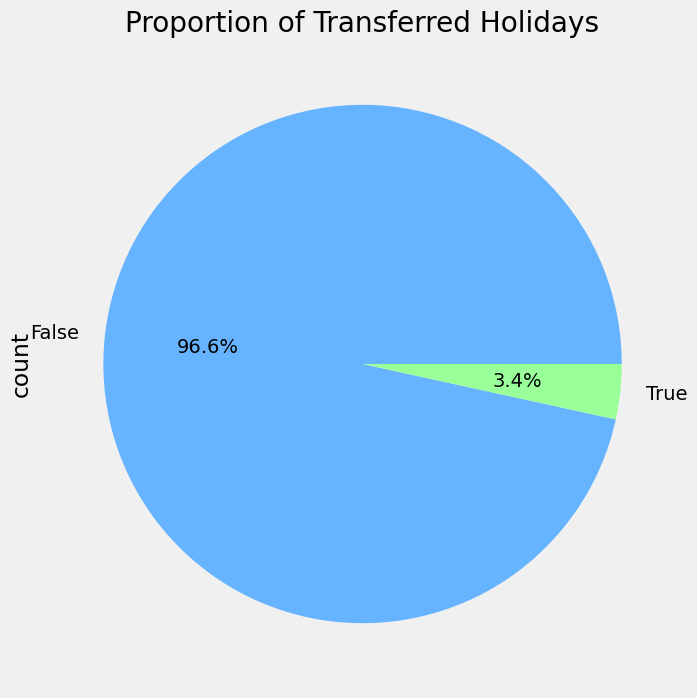

In [25]:
plt.figure(figsize=(8, 8))
holiday_events['transferred'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Proportion of Transferred Holidays')
plt.show()


# Visualizing Changes in Crude Oil Prices over Time

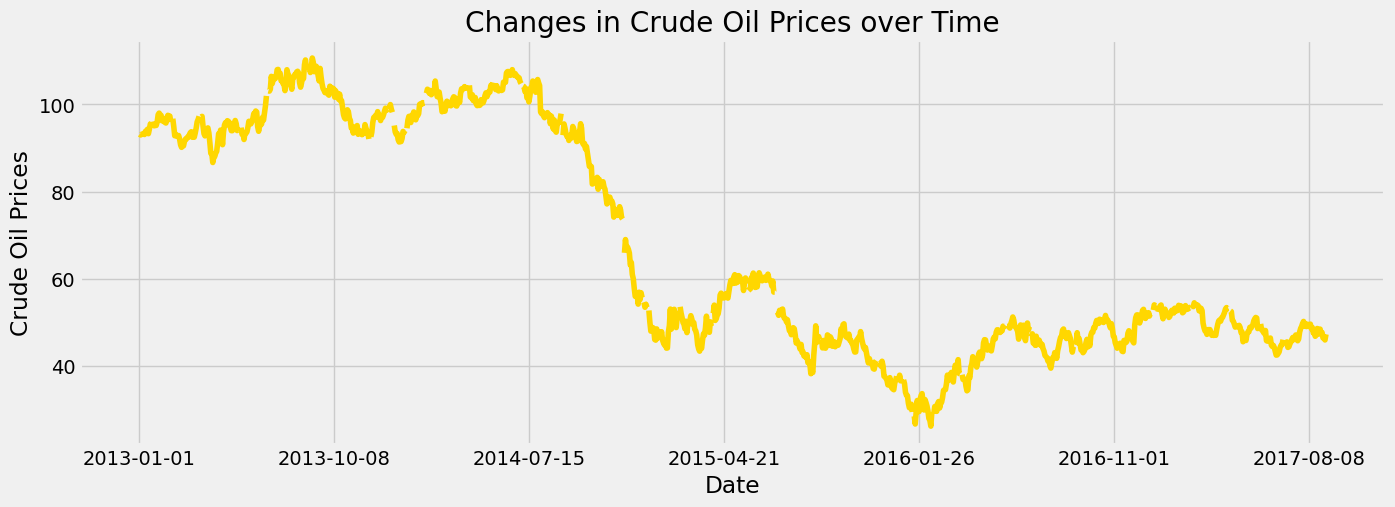

In [26]:
oil_table.set_index("date")
oil_table.plot(x="date", y="dcoilwtico", color="gold", legend=False, figsize=(15,5))
plt.title('Changes in Crude Oil Prices over Time')
plt.xlabel('Date')
plt.ylabel('Crude Oil Prices')
plt.style.use("fivethirtyeight")
plt.show()

## Store Type Distribution:

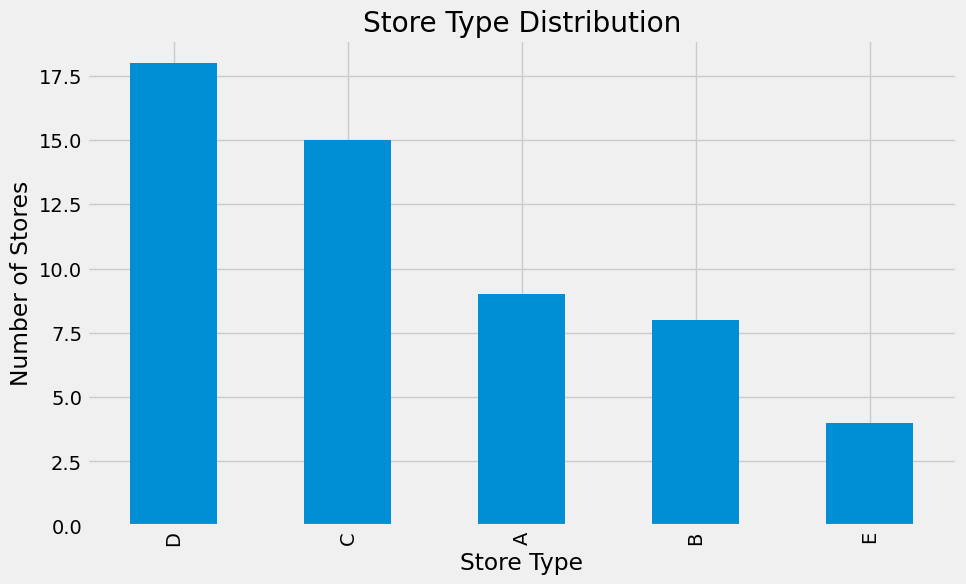

In [27]:
plt.figure(figsize=(10, 6))
stores_table['type'].value_counts().plot(kind='bar')
plt.title('Store Type Distribution')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.show()


## Store Distribution by State:

In [64]:
stores_table['city']

store_nbr
1             Quito
2             Quito
3             Quito
4             Quito
5     Santo Domingo
6             Quito
7             Quito
8             Quito
9             Quito
10            Quito
11          Cayambe
12        Latacunga
13        Latacunga
14         Riobamba
15           Ibarra
16    Santo Domingo
17            Quito
18            Quito
19         Guaranda
20            Quito
21    Santo Domingo
22             Puyo
23           Ambato
24        Guayaquil
25          Salinas
26        Guayaquil
27            Daule
28        Guayaquil
29        Guayaquil
30        Guayaquil
31         Babahoyo
32        Guayaquil
33          Quevedo
34        Guayaquil
35           Playas
36         Libertad
37           Cuenca
38             Loja
39           Cuenca
40          Machala
41          Machala
42           Cuenca
43       Esmeraldas
44            Quito
45            Quito
46            Quito
47            Quito
48            Quito
49            Quito
50        

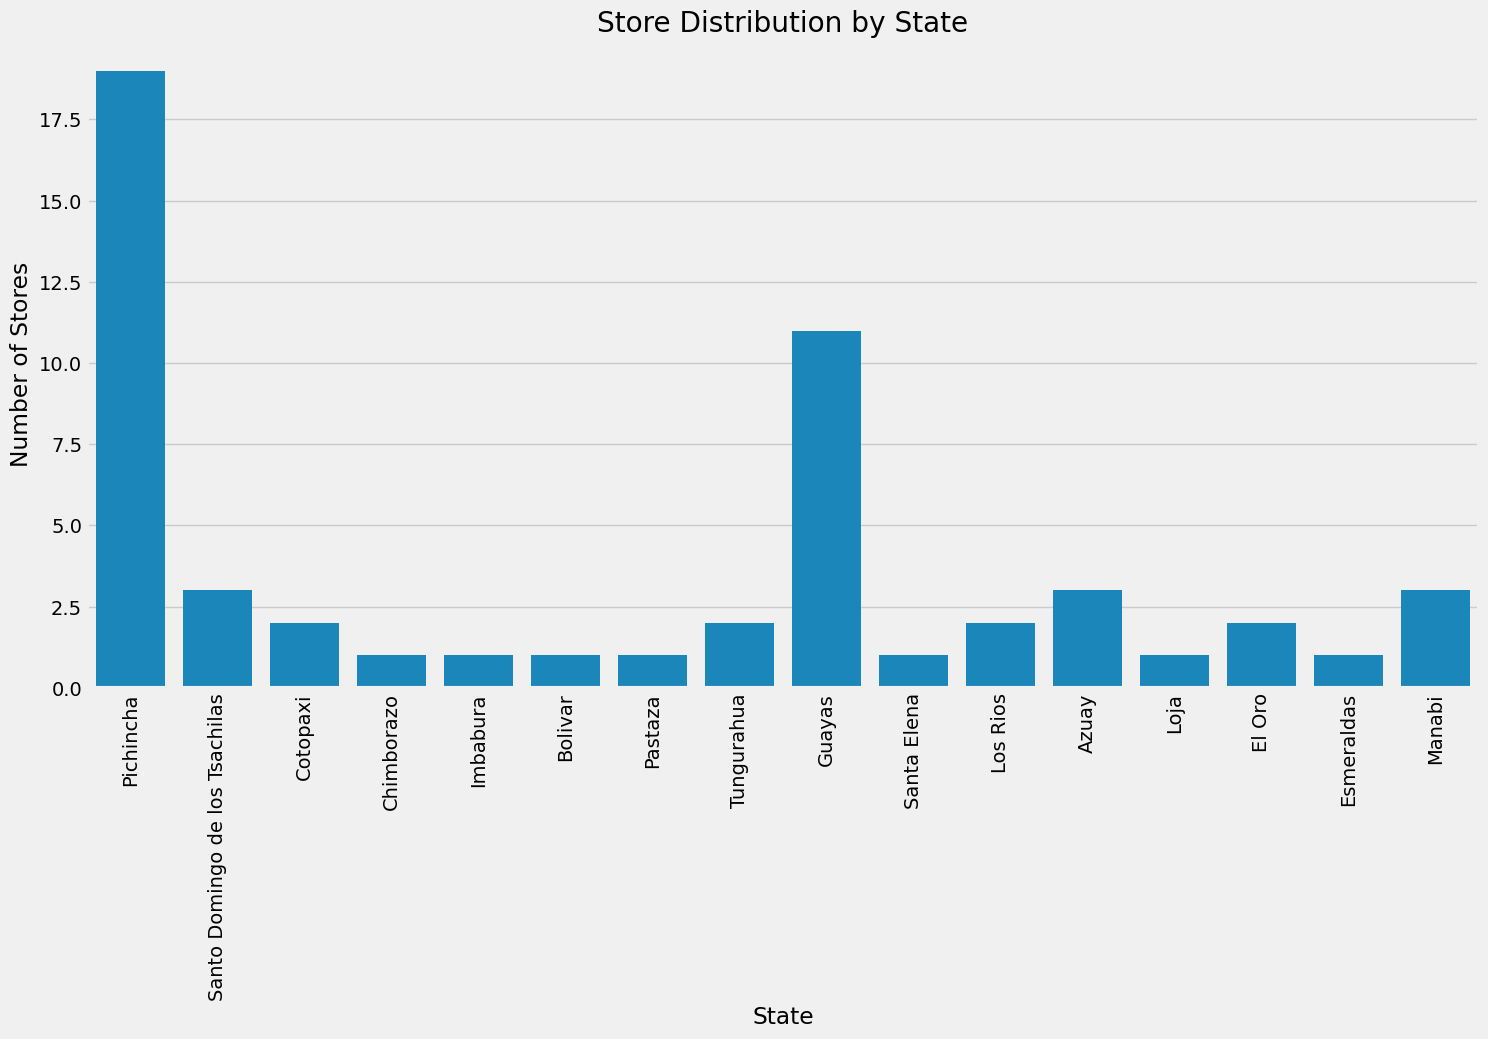

In [66]:
plt.figure(figsize=(16, 8))  # Adjust the width as needed
sns.countplot(x='state', data=stores_table)
plt.xticks(rotation=90)
plt.title('Store Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.show()



## Cluster Analysis for the stores :

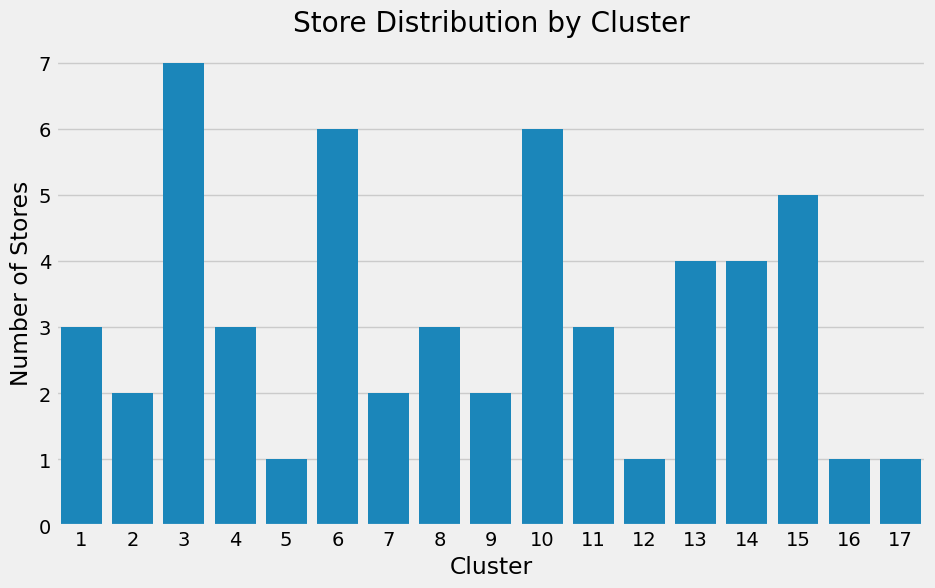

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=stores_table)
plt.title('Store Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Stores')
plt.show()


## Univariate analysis

Univariate Analysis for Train Data:


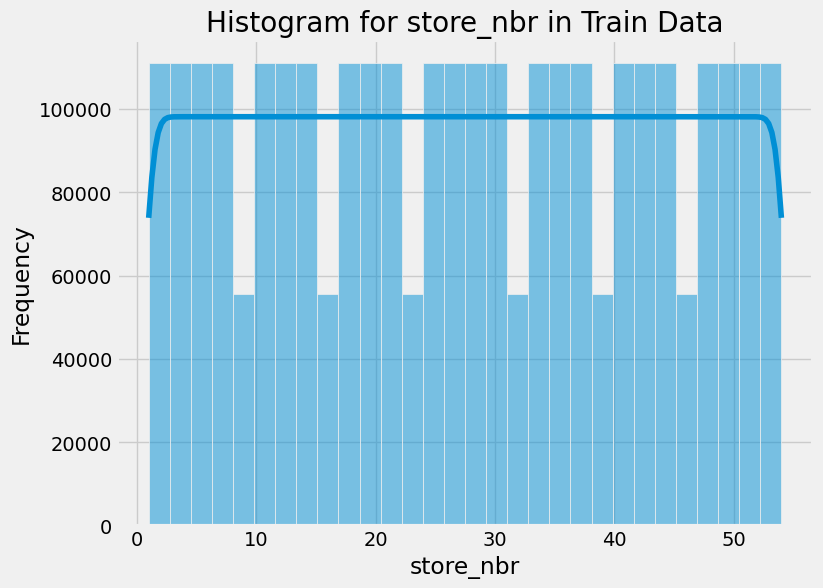

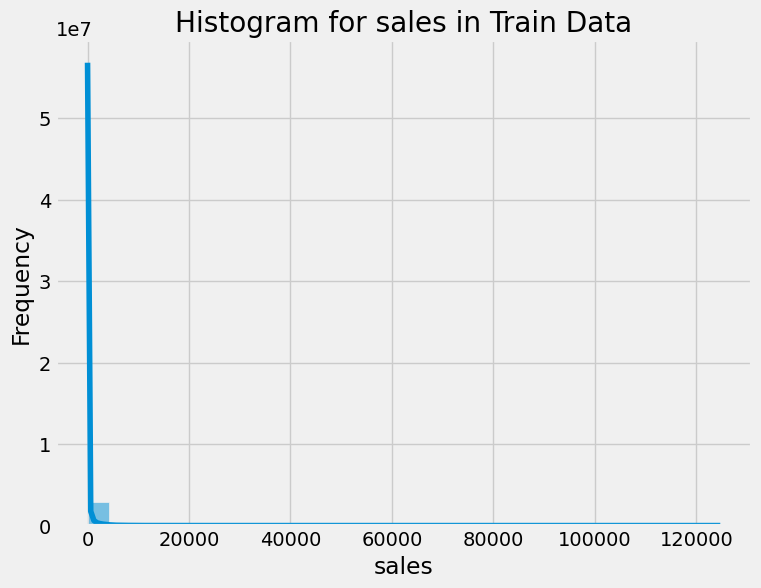

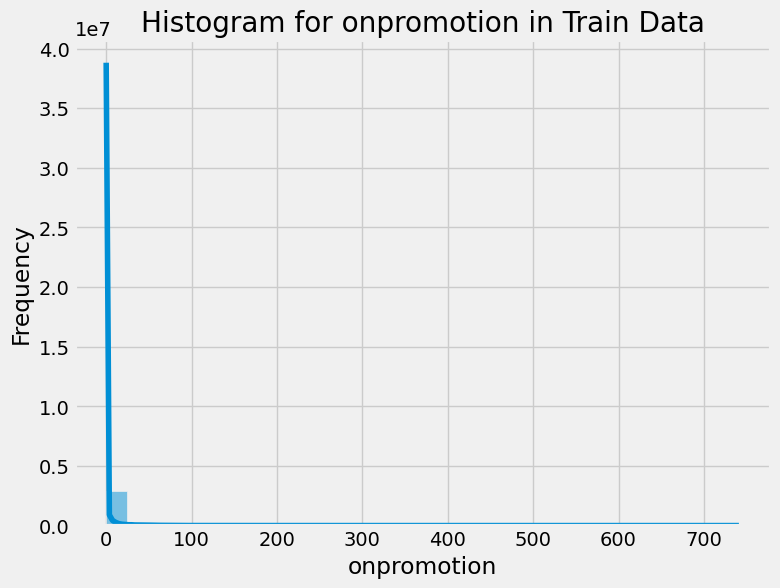

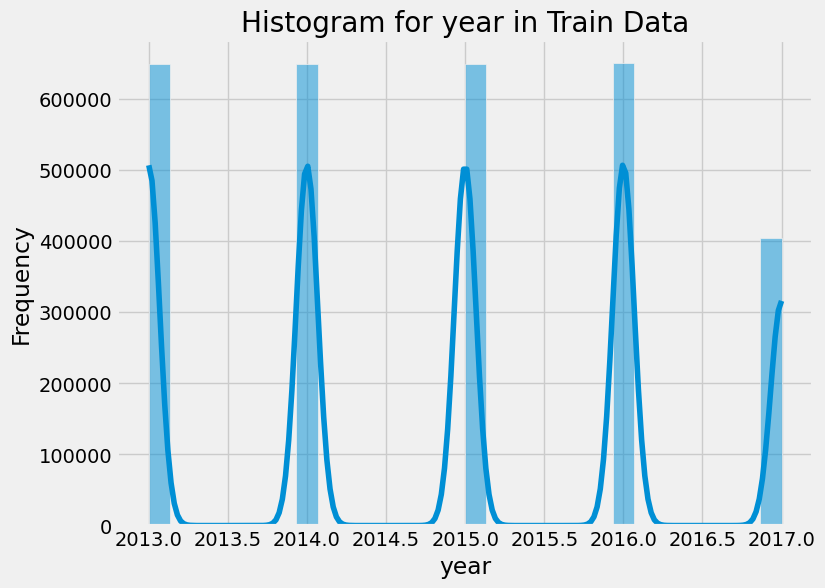

Univariate Analysis for Test Data:


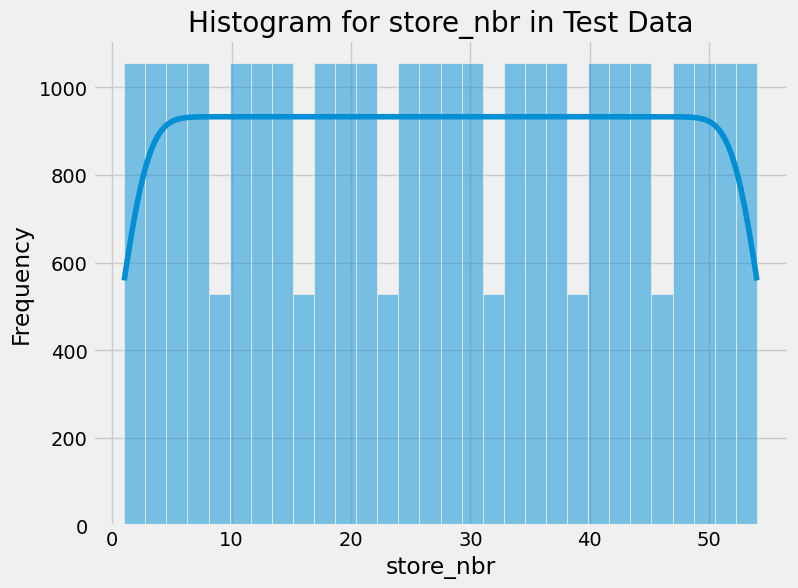

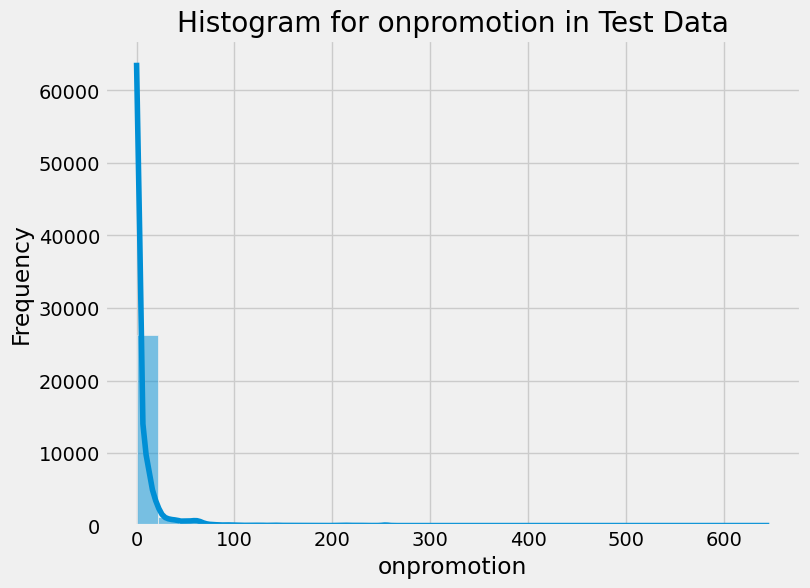

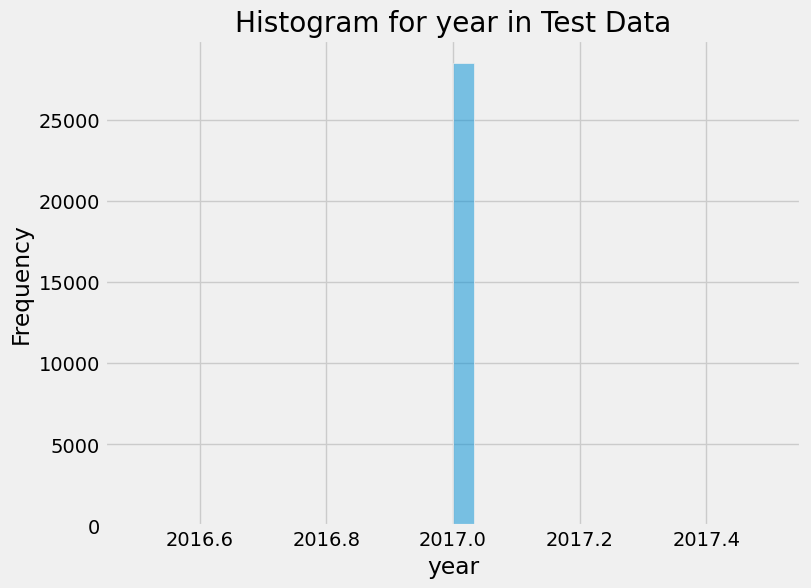

Univariate Analysis for Transaction Data:


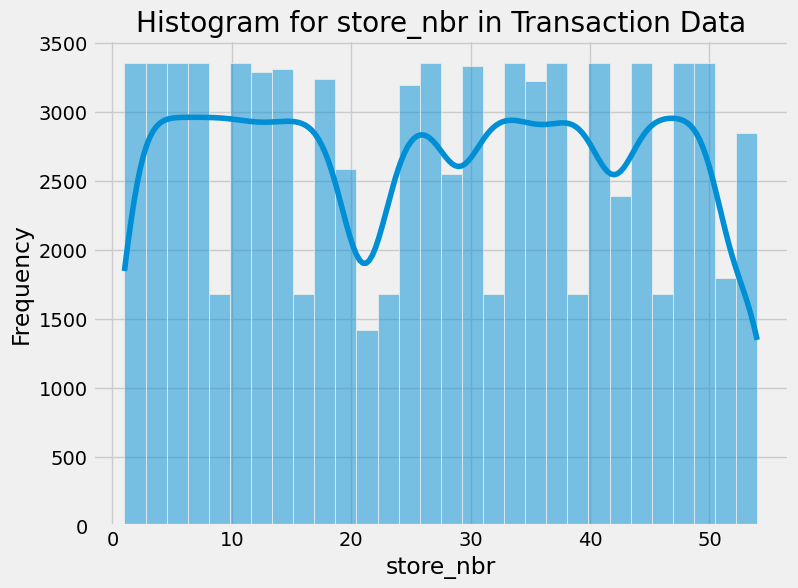

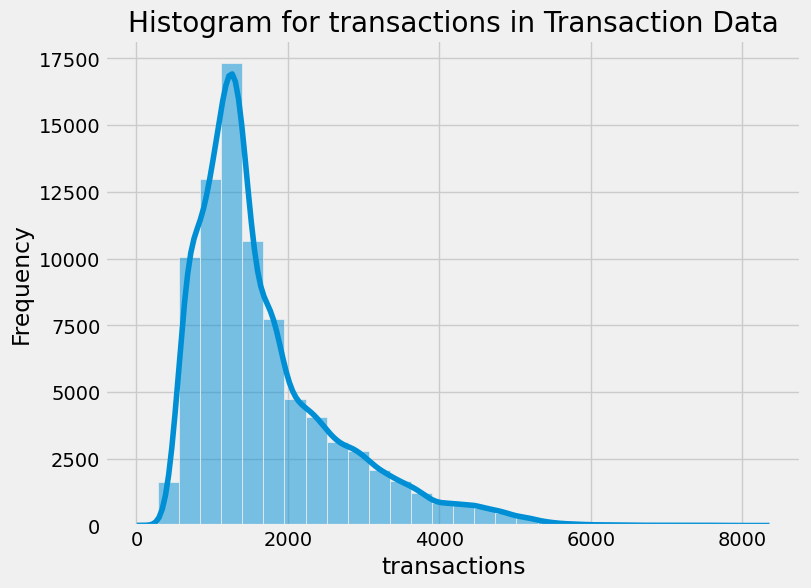

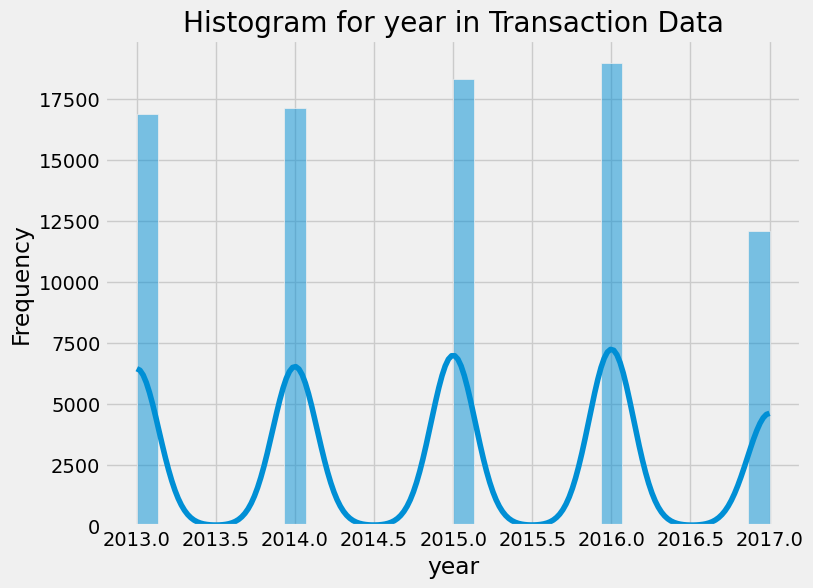

In [67]:

# Function for univariate analysis
def univariate_analysis(df, name):
    print(f"Univariate Analysis for {name}:")
    
    # Extract numerical columns for analysis
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Plot histograms for numerical columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Histogram for {column} in {name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Perform univariate analysis for train_data
univariate_analysis(train_data, "Train Data")

# Perform univariate analysis for test_data
univariate_analysis(test_data, "Test Data")

# Perform univariate analysis for transaction_data
univariate_analysis(transaction_data, "Transaction Data")



# Step 4: ## Hypothesis & Questions



The questions below are to be answered. Do note that, you are free to draw more hypothesis from the data.

## Missing Dates in holiday data

In [31]:

min_date = train_data['date'].min()
max_date = train_data['date'].max()

# Generate a range of dates from the minimum to maximum date
expected_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Check if all expected dates are present in the train dataset
missing_dates = expected_dates[~expected_dates.isin(holiday_events['date'])]

if missing_dates.empty:
    print("The train dataset is complete.")
else:
    print("The train dataset is missing the following dates:")
    print(missing_dates)

The train dataset is missing the following dates:
DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-06',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-13',
               ...
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-06',
               '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-12',
               '2017-08-13', '2017-08-14'],
              dtype='datetime64[ns]', length=1432, freq=None)


## Missing Dates in oil data

In [32]:
min_date = train_data['date'].min()
max_date = train_data['date'].max()

# Generate a range of dates from the minimum to maximum date
expected_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Check if all expected dates are present in the train dataset
missing_dates = expected_dates[~expected_dates.isin(oil_table['date'])]

if missing_dates.empty:
    print("The train dataset is complete.")
else:
    print("The train dataset is missing the following dates:")
    print(missing_dates)

The train dataset is missing the following dates:
DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-15', '2017-07-16', '2017-07-22', '2017-07-23',
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13'],
              dtype='datetime64[ns]', length=482, freq=None)


## Missing Dates in Transaction data

In [33]:
min_date = train_data['date'].min()
max_date = train_data['date'].max()

# Generate a range of dates from the minimum to maximum date
expected_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Check if all expected dates are present in the train dataset
missing_dates = expected_dates[~expected_dates.isin(transaction_data['date'])]

if missing_dates.empty:
    print("The train dataset is complete.")
else:
    print("The train dataset is missing the following dates:")
    print(missing_dates)

The train dataset is missing the following dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-01-01',
               '2016-01-03', '2016-12-25'],
              dtype='datetime64[ns]', freq=None)


## 1 Is the train dataset complete (has all the required dates)?

# Checking for Completeness of Dates in Time Series Data

## Importance of Checking for Completeness

Ensuring that your time series data is complete and follows a consistent time interval is essential for several reasons:

1. **Temporal Consistency:**
   - Time series data relies on a consistent time interval between observations. Incomplete or irregular timestamps can disrupt the temporal continuity of the data, making it challenging to analyze and model.

2. **Data Integrity:**
   - Missing or irregular timestamps can lead to gaps in your time series, resulting in the loss of valuable information. These gaps may occur due to various reasons, including data collection errors or system failures.

3. **Modeling Assumptions:**
   - Many time series models, such as autoregressive models (e.g., ARIMA) and seasonal models, assume a regular and consistent time interval between observations. Inconsistent timestamps can violate these assumptions and lead to unreliable model results.

4. **Data Preprocessing:**
   - Preprocessing steps like imputation of missing values or resampling may be required to handle incomplete or irregular timestamps. However, these steps can introduce additional uncertainty into the data and the modeling process.

## Summary

Checking and ensuring the completeness and consistency of timestamps in your time series data is a critical step in data preprocessing. It helps maintain the integrity of your data and ensures that your time series models are built on a solid foundation, leading to more reliable insights and forecasts.


In [34]:

min_date = train_data['date'].min()
max_date = train_data['date'].max()

# Generate a range of dates from the minimum to maximum date
expected_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Check if all expected dates are present in the train dataset
missing_dates = expected_dates[~expected_dates.isin(train_data['date'])]

if missing_dates.empty:
    print("The train dataset is complete.")
else:
    print("The train dataset is missing the following dates:")
    print(missing_dates)


The train dataset is missing the following dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [35]:

min_date2 = holiday_events['date'].min()
max_date2 = holiday_events['date'].max()

# Generate a range of dates from the minimum to maximum date
expected_dates = pd.date_range(start=min_date2, end=max_date2, freq='D')

# Check if all expected dates are present in the train dataset
missing_dates2 = expected_dates[~expected_dates.isin(holiday_events['date'])]

if missing_dates2.empty:
    print("The holiday dataset is complete.")
else:
    print("The holiday dataset is missing the following dates:")
    print(missing_dates2)


The holiday dataset is missing the following dates:
DatetimeIndex(['2012-03-03', '2012-03-04', '2012-03-05', '2012-03-06',
               '2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12',
               ...
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-16', '2017-12-17', '2017-12-18',
               '2017-12-19', '2017-12-20'],
              dtype='datetime64[ns]', length=1814, freq=None)


In [36]:
# Create a DataFrame with missing dates

missing_dates_df = pd.DataFrame({'missing_dates': missing_dates2})

In [37]:
# Concatenate 'holiday_events' and 'missing_dates_df'
holiday_events_with_missing_dates = pd.concat([holiday_events, missing_dates_df], ignore_index=True)


## 2 Which dates have the lowest and highest sales for each year?

In [38]:

# Find the date with the lowest sales for each year
min_sales_dates = train_data.loc[train_data.groupby('year')['sales'].idxmin()][['year', 'date', 'month', 'sales']]

# Find the date with the highest sales for each year
max_sales_dates = train_data.loc[train_data.groupby('year')['sales'].idxmax()][['year', 'date', 'month', 'sales']]

print("Dates with the Lowest Sales for Each Year:")
print(min_sales_dates)

print("\nDates with the Highest Sales for Each Year:")
print(max_sales_dates)


Dates with the Lowest Sales for Each Year:
         year       date    month  sales
id                                      
0        2013 2013-01-01  January    0.0
648648   2014 2014-01-01  January    0.0
1297296  2015 2015-01-01  January    0.0
1945944  2016 2016-01-01  January    0.0
2596374  2017 2017-01-01  January    0.0

Dates with the Highest Sales for Each Year:
         year       date     month       sales
id                                            
562596   2013 2013-11-12  November   46271.000
1257246  2014 2014-12-08  December   45361.000
1916586  2015 2015-12-14  December   40351.460
2163723  2016 2016-05-02       May  124717.000
2760297  2017 2017-04-02     April   38422.625


## 4 Are certain groups of stores selling more products? (Cluster, city, state, type)

## 5 Are sales affected by promotions, oil prices and holidays?

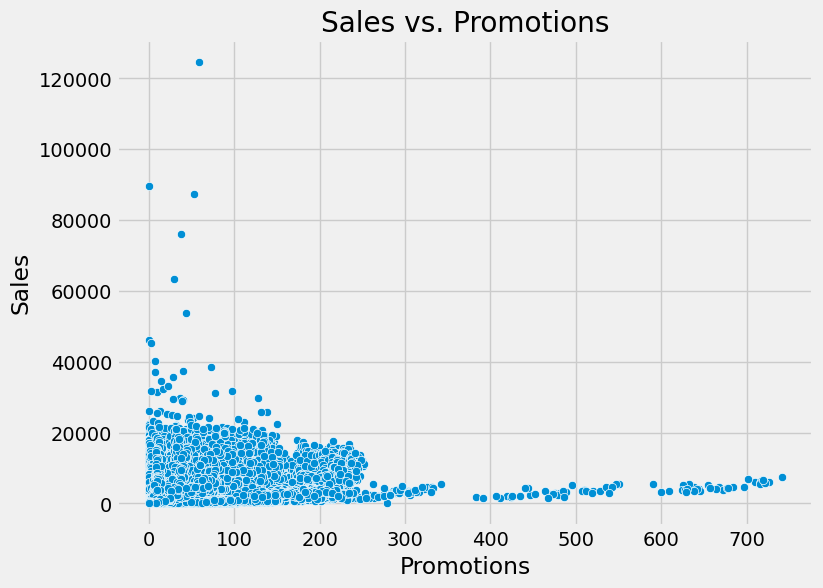

In [39]:


# Correlation analysis
correlation_promotions = train_data[['sales', 'onpromotion']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='onpromotion', y='sales', data=train_data)
plt.title('Sales vs. Promotions')
plt.xlabel('Promotions')
plt.ylabel('Sales')
plt.show()


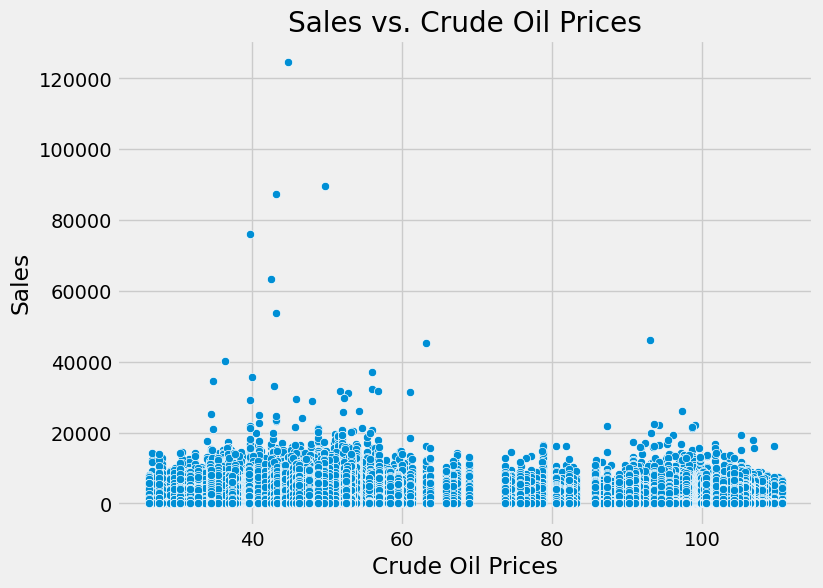

In [40]:


# Convert 'date' to datetime in both DataFrames
oil_table['date'] = pd.to_datetime(oil_table['date'])

# Merge 'train' and 'oil' on 'date'
merged_data = pd.merge(train_data, oil_table, on='date', how='left')

# Correlation analysis
correlation_oil_prices = merged_data[['sales', 'dcoilwtico']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dcoilwtico', y='sales', data=merged_data)
plt.title('Sales vs. Crude Oil Prices')
plt.xlabel('Crude Oil Prices')
plt.ylabel('Sales')
plt.show()


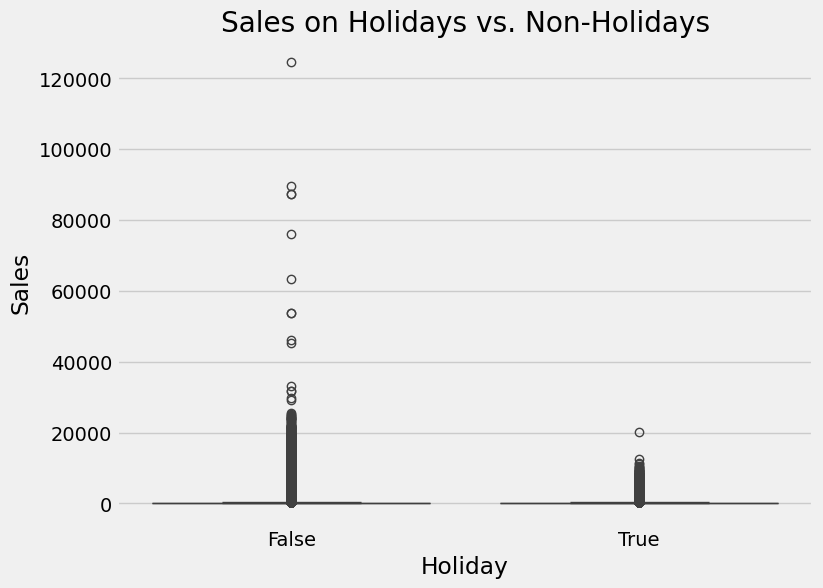

In [41]:


# Convert 'date' to datetime in both DataFrames
train_data['date'] = pd.to_datetime(train_data['date'])
holiday_events['date'] = pd.to_datetime(holiday_events['date'])

# Merge 'train' and 'holiday' on 'date'
merged_data_holidays = pd.merge(train_data, holiday_events, on='date', how='left')

# Correlation analysis
correlation_holidays = merged_data_holidays[['sales', 'transferred']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='transferred', y='sales', data=merged_data_holidays)
plt.title('Sales on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()


### FEATURE ENGINERING 

In [42]:
train_data['date'] = pd.to_datetime(train_data['date']).dt.to_period('m')

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype    
---  ------       -----    
 0   date         period[M]
 1   store_nbr    int64    
 2   family       object   
 3   sales        float64  
 4   onpromotion  int64    
 5   year         int32    
 6   month        object   
dtypes: float64(1), int32(1), int64(2), object(2), period[M](1)
memory usage: 236.2+ MB


## Data Aggregation and Pivot Table Creation

### Overview
In this analysis, I performed data aggregation and created a pivot table using the 'train' dataset. The primary goal was to summarize sales data based on specific criteria.

In [44]:

# Convert 'date' to datetime format
# train_data['date'] = pd.to_datetime(train_data['date'].astype(str))

# Resetting the index (if needed)
train_reset = train_data.reset_index()

# Creating a pivot table
train_pivot = pd.pivot_table(data=train_reset, index='date', columns='family', aggfunc='sum', values='sales')

# Display the pivot table
print(train_pivot)


family   AUTOMOTIVE  BABY CARE   BEAUTY  BEVERAGES   BOOKS   BREAD/BAKERY  \
date                                                                        
2013-01      6557.0        0.0   4019.0  1670653.0     0.0  549778.856175   
2013-02      7220.0        0.0   3747.0  1508254.0     0.0  499809.403770   
2013-03      7635.0        0.0   3901.0  1822220.0     0.0  594024.801690   
2013-04      7485.0        0.0   3670.0  1743121.0     0.0  568623.219100   
2013-05      9034.0        0.0   3716.0  1824123.0     0.0  616045.653359   
2013-06      8311.0        0.0   3842.0  1829106.0     0.0  607785.690020   
2013-07      8508.0        0.0   4780.0  1664465.0     0.0  568490.334004   
2013-08      8164.0        0.0   4720.0  1810927.0     0.0  574358.368180   
2013-09      7029.0        0.0   3607.0  1908153.0     0.0  615401.429876   
2013-10      6803.0        0.0   3753.0  1855355.0     0.0  610595.110390   
2013-11      7166.0        0.0   3446.0  1895439.0     0.0  585894.351930   

In [45]:
#Comparing the 2 datas shape 
train_pivot.shape,train_data.shape

((56, 33), (3000888, 7))

In [69]:
# Assuming 'train' is your DataFrame and 'date' is the column containing dates
min_date = train_data['date'].min()
max_date = train_data['date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")


Minimum Date: 2013-01
Maximum Date: 2017-08


In [70]:

train_set = train_data.loc[train_data['year'].isin([2013, 2014, 2015])]
test_set = train_data.loc[train_data['year'].isin([2016, 2017])]


In [71]:
train_set.shape,test_set.shape

((1945944, 7), (1054944, 7))

In [72]:
train_data.head()

,date,store_nbr,family,sales,onpromotion,year,month
id,,,,,,,
0,2013-01,1,AUTOMOTIVE,0.0,0,2013,January
1,2013-01,1,BABY CARE,0.0,0,2013,January
2,2013-01,1,BEAUTY,0.0,0,2013,January
3,2013-01,1,BEVERAGES,0.0,0,2013,January
4,2013-01,1,BOOKS,0.0,0,2013,January


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_imputation(data):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data['sales'], period=12)  # You may adjust the period based on your data
    
    # Use the seasonal component to fill missing values in 'sales'
    data['sales_imputed'] = data['sales'].fillna(decomposition.seasonal)
    
    # Fill missing values in 'dcoilwtico' using backward fill
    data['dcoilwtico_imputed'] = data['dcoilwtico'].fillna(method='bfill')
    
    return data

# Apply the seasonal_imputation function to train_data
merged_data = seasonal_imputation(merged_data)

# Print the modified DataFrame
print(merged_data)


              date  store_nbr                      family     sales  \
0       2013-01-01          1                  AUTOMOTIVE     0.000   
1       2013-01-01          1                   BABY CARE     0.000   
2       2013-01-01          1                      BEAUTY     0.000   
3       2013-01-01          1                   BEVERAGES     0.000   
4       2013-01-01          1                       BOOKS     0.000   
...            ...        ...                         ...       ...   
3000883 2017-08-15          9                     POULTRY   438.133   
3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  year    month  dcoilwtico  sales_imputed  \
0                  0  2013  January         NaN          0.000   
1              

In [80]:
merged_data['dcoilwtico_imputed']

0          93.139999
1          93.139999
2          93.139999
3          93.139999
4          93.139999
             ...    
3000883    47.570000
3000884    47.570000
3000885    47.570000
3000886    47.570000
3000887    47.570000
Name: dcoilwtico_imputed, Length: 3000888, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

# Assuming 'train_data' is your DataFrame
# Specify the features (X) and the target variable (y)
features = ['store_nbr', 'onpromotion', 'year', 'dcoilwtico_imputed', 'sales_imputed']
target = 'sales'  # Replace with your actual target variable

# Split the data into features (X) and target variable (y)
X = merged_data[features]
y = merged_data[target]

# Split the data into training and evaluation sets (e.g., 80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Evaluation set shape:", X_eval.shape, y_eval.shape)


Training set shape: (2400710, 5) (2400710,)
Evaluation set shape: (600178, 5) (600178,)


# Assuming you have already split your data into X, y, X_eval, and y_eval

# Model 1: Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np

# Assuming X, y, X_eval, and y_eval are defined

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18)

# Train the model on the training set
rf.fit(X, y)

# Make predictions on the evaluation set
rf_pred = rf.predict(X_eval)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_eval, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_msle = mean_squared_log_error(y_eval, rf_pred)  # Import the mean_squared_log_error function
rf_rmsle = np.sqrt(rf_msle)

# Print the results
print("Random Forest Model:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MSLE: {rf_msle}")
print(f"RMSLE: {rf_rmsle}")


Random Forest Model:
MSE: 73116.85662890348
RMSE: 270.4012881420935
MSLE: 7.213751628958117
RMSLE: 2.6858428153855387


## Random Forest Model Evaluation

### Mean Squared Error (MSE)
- MSE measures the average squared difference between predicted and actual values.
- In this case, MSE is 73116.86. Lower values indicate better model performance. Interpretation depends on the scale of the target variable (sales in this case).

### Root Mean Squared Error (RMSE)
- RMSE is the square root of the MSE and is in the same units as the target variable.
- Your RMSE is 270.40. It estimates the standard deviation of prediction errors. Lower values indicate better model performance.

### Mean Squared Log Error (MSLE)
- MSLE measures the average squared logarithmic difference between predicted and actual values. Useful for a wide range of target variables.
- Your MSLE is 7.21. Lower MSLE suggests better performance, but interpretation depends on data characteristics.

### Root Mean Squared Log Error (RMSLE)
- RMSLE is the square root of the MSLE and is in the same units as the target variable.
- Your RMSLE is 2.69. Lower values indicate better model performance.

**Interpretation:**  
- Overall, the model's performance is assessed based on these metrics. Comparisons with baseline models or alternative models can provide additional context. Visualization of predicted vs. actual values or residuals may offer further insights.


Plotting the model 

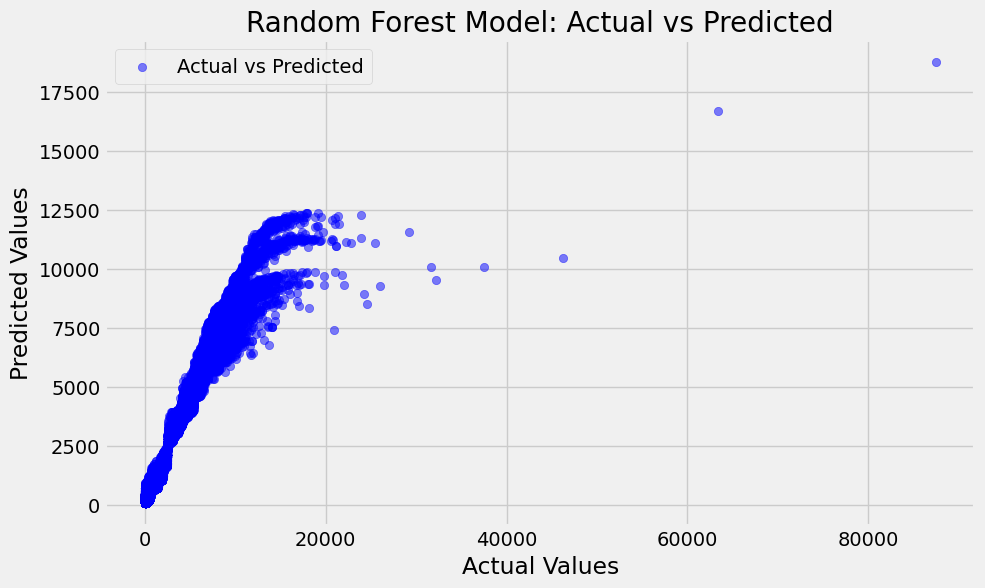

In [85]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_eval, rf_pred, alpha=0.5, color='blue', label='Actual vs Predicted')

# Add labels and title
plt.title('Random Forest Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



# Assuming you have already fitted your AR model and have the 'model' variable

# Prediction for AR model

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [93]:

# Train an autoregressive model (you should have a suitable lag value)
lag = 1  # Adjust the lag value based on your data and analysis
model = AutoReg(train_data['sales'], lags=lag)
fitted_model = model.fit()

# Make predictions for the evaluation set
AR_pred = fitted_model.predict(start=len(train_set), end=len(train_set) + len(test_set) - 1, dynamic=False)




Mean Squared Error (MSE): 1742206.9201141868


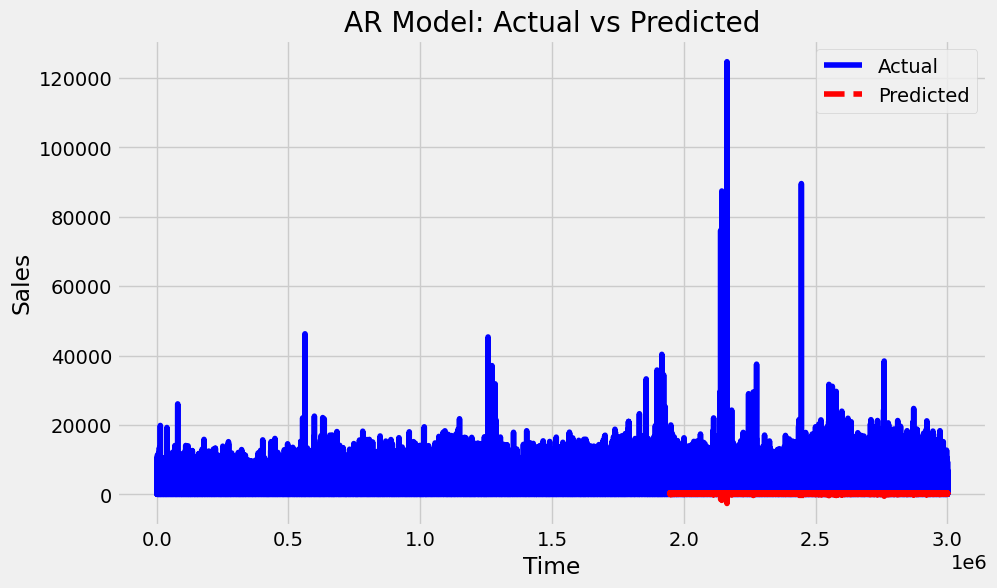

In [94]:
# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(test_set['sales'], AR_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(merged_data['sales'], label='Actual', color='blue')
plt.plot(AR_pred, label='Predicted', color='red', linestyle='--')
plt.title('AR Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Importance of Mean Squared Error (MSE) in Model Evaluation

## Overview

Mean Squared Error (MSE) is a commonly used metric in the evaluation of predictive models, especially in regression tasks. It quantifies the average squared difference between the predicted values and the actual values. The importance of MSE lies in its ability to provide a numerical measure of the model's accuracy.

## Key Points

### 1. **Measure of Prediction Accuracy**

   - MSE serves as a measure of how well a predictive model is able to make accurate predictions. Lower MSE values indicate that the predicted values closely align with the actual values.

### 2. **Comparison to Baseline Models**

   - MSE is valuable for comparing the performance of a model against baseline models. If the model's MSE is significantly lower than a naive baseline (e.g., predicting the mean of the target variable), it suggests that the model is providing meaningful predictions.

### 3. **Sensitivity to Outliers**

   - MSE is sensitive to outliers; squared differences can heavily penalize large errors. As a result, it provides an incentive for the model to minimize the impact of extreme deviations in prediction.

### 4. **Context-Specific Evaluation**

   - The interpretation of MSE is context-specific and depends on the specific requirements of the application. What is considered a "good" or "bad" MSE value can vary based on the problem domain and the consequences of prediction errors.

### 5. **Model Comparison**

   - MSE allows for the comparison of different models. When evaluating multiple models, the one with the lower MSE is generally preferred, as it suggests superior predictive accuracy.

## Considerations

- **Scale of the Data:**
  - It's essential to consider the scale of the target variable when interpreting MSE. Understanding how the MSE relates to the range of the target variable provides additional insights.

- **Domain Knowledge:**
  - Consulting domain experts is crucial to understanding the practical significance of the MSE. Domain-specific knowledge can help determine whether the model's predictive performance meets the requirements of the application.

## Conclusion

MSE is a versatile metric that plays a central role in assessing the accuracy and effectiveness of predictive models. However, it should be considered in conjunction with other evaluation metrics and in the broader context of the specific problem domain.


In [51]:

# # Evaluate AR model
# ar_mse = mean_squared_error(eval_data, AR_pred)
# ar_msle = mean_squared_log_error(eval_data, AR_pred)
# ar_rmse = np.sqrt(ar_mse).round(2)
# ar_rmsle = np.sqrt(ar_msle).round(2)

# # Create a DataFrame to store results
# results = pd.DataFrame([['AR', ar_mse, ar_msle, ar_rmse, ar_rmsle]],
#                        columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])

# # Print the results
# print("AR Model Evaluation Results:")
# print(results)